In [ ]:
# The link for the data collected from kaggle and github
# https://drive.google.com/file/d/1TtC4tejjYWDqa84K4DGy4dfFQX0Envkh/view?usp=sharing

In [16]:
# Setting the path from where data is to be obtained
path_train="CovidDataset/Train"
path_val="CovidDataset/Val"

In [6]:
# Importing all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [25]:
# Creating the CNN Model 

model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu",))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer="adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 54, 54, 64)       

In [12]:
#Creating a generator which will go through the directories and randomly give a batch of images

train_datagen=image.ImageDataGenerator(rescale=1.0/255.0,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_generator=train_datagen.flow_from_directory(path_train,
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode="binary")


Found 224 images belonging to 2 classes.


In [17]:
#Creating a similar generator (but without augmentation) for validation data

val_datagen=image.ImageDataGenerator(rescale=1.0/255.0)

val_data_generator=val_datagen.flow_from_directory(path_val,
                               target_size=(224,224),
                               batch_size=32,
                               class_mode="binary")

Found 60 images belonging to 2 classes.


In [27]:
#Running the model keeping the history of every step

hist=model.fit_generator(generator=train_data_generator,
                         steps_per_epoch=8,
                         epochs=10,
                         validation_data=val_data_generator,
                         validation_steps=2)

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 0.3587 - accuracy: 0.8359 - val_loss: 0.2356 - val_accuracy: 0.9500
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.2482 - accuracy: 0.9062 - val_loss: 0.2120 - val_accuracy: 0.9500
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.2309 - accuracy: 0.9023 - val_loss: 0.2114 - val_accuracy: 0.9667
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.1461 - accuracy: 0.9414 - val_loss: 0.0481 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.1424 - accuracy: 0.9492 - val_loss: 0.1099 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.1395 - accuracy: 0.9570 - val_loss: 0.1675 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.1539 - accuracy: 0.9453 - val_loss: 0.0650 - val_accuracy: 0.9833
Epoch 8/10
8/8 [==================

In [18]:
train_data_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
# Plotting the path of accuracy and loss through epochs using history object

In [30]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

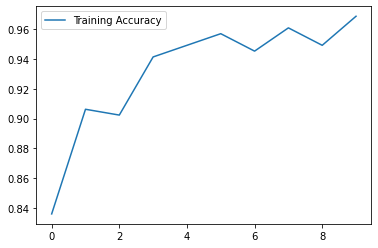

In [48]:
plt.plot(acc,label='Training Accuracy')
plt.legend()
plt.show()

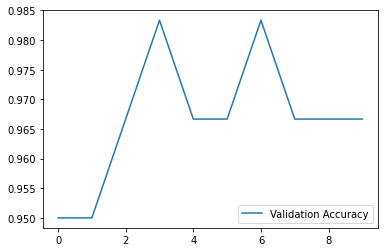

In [49]:
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.show()

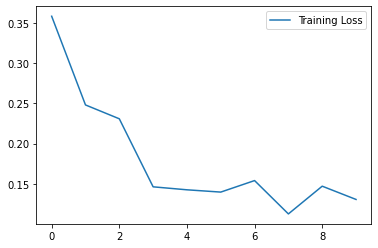

In [50]:
plt.plot(loss,label="Training Loss")
plt.legend()
plt.show()

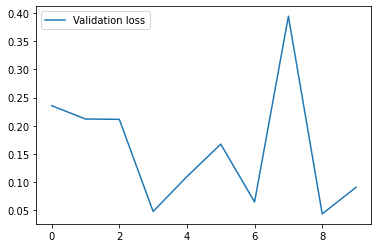

In [51]:
plt.plot(val_loss,label="Validation loss")
plt.legend()
plt.show()